# Day 48

## Steps

1. Importing the Libraries
2. Importing the Datasets
3. Performing the Data Analysis (DM, DE, DC, DV, EDA)
4. Feature Scaling [Optional]
5. Encoding
6. Feature selection
7. Choosing the model - Logistic Regression
8. Split the Data - CV
9. Training the model
10. Testing the model
11. Performance - Confusion Metric

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

### Importing the datasets

Links: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

In [2]:
df = pd.read_csv ("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

### Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

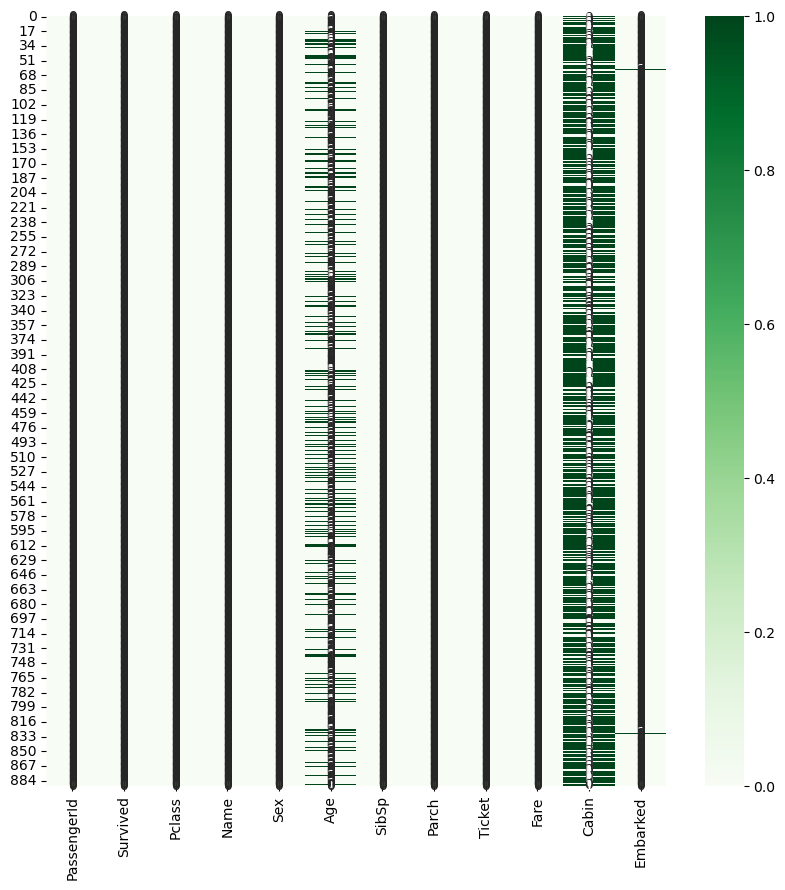

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isna(), annot = True, cmap ='Greens');

In [9]:
print(f'''As we can see {round(df.Age.isna().sum() / len(df.Age)*100,2)}% of Age, {round(df.Cabin.isna().sum() / len(df.Cabin)*100,2)}% of Cabin & {round(df.Embarked.isna().sum() / len(df.Embarked)*100,2)}% of Embarked is having the null values.''')

As we can see 19.87% of Age, 77.1% of Cabin & 0.22% of Embarked is having the null values.


In [10]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# As we do not have any relation to predict the cabin no so we are droping the column
df.drop("Cabin", axis =1, inplace=True)

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
# After droping the column let's check how many null values do we have now.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
df.Embarked.unique()
# S - Southampton
# Q - Queenstown
# C - Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
# Show the datapoints where Embark is null
df[df.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [17]:
# show all the Embarked values where the Pclass = 1
df.loc[df.Pclass ==1,'Embarked']

1      C
3      S
6      S
11     S
23     S
      ..
871    S
872    S
879    C
887    S
889    C
Name: Embarked, Length: 216, dtype: object

In [18]:
df.loc[df.Pclass ==1,'Embarked'].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [19]:
# show all the Embarked values where the Pclass = 2
df.loc[df.Pclass == 2,'Embarked'].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [20]:
# show all the Embarked values where the Pclass = 3
df.loc[df.Pclass == 3,'Embarked'].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [21]:
# show all the Embarked values where the Fare = 80.00
df.loc[df.Fare == 80.0,'Embarked'].value_counts()

Series([], Name: Embarked, dtype: int64)

In [22]:
df.loc[df.Ticket == 113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [23]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [24]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [25]:
# Mean of Age Column
df.Age.mean()

29.69911764705882

In [26]:
# Median of Age Column
df.Age.median()

28.0

In [27]:
# Modea of Age Column
df.Age.mode()

0    24.0
Name: Age, dtype: float64

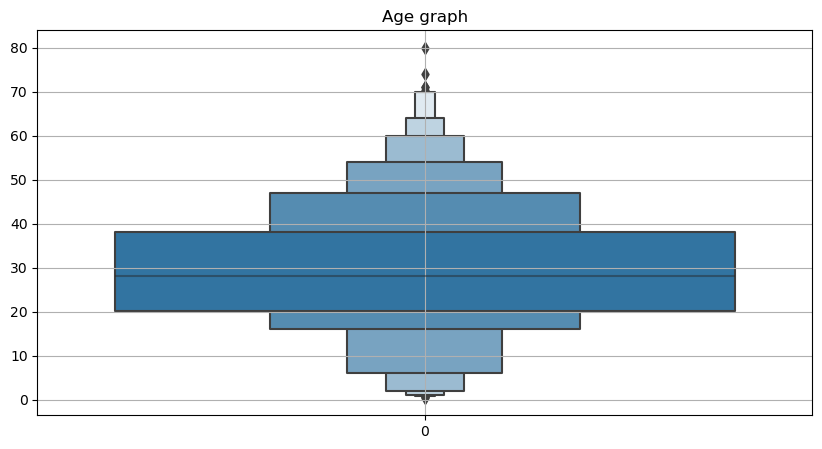

In [28]:
# Plot a boxplot to find out the outliers in the Age column.

plt.figure(figsize=(10,5))
# sns.boxplot(df.Age);
sns.boxenplot(df.Age);
plt.title("Age graph");
plt.grid()

In [29]:
#  Fill all the null values in Age Column with the median values
df.Age.fillna(df.Age.median(),inplace=True)

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
# We can't find any relation to the Embarked NaN values so we are droping those 2 NaN rows.
df.dropna(inplace = True)

In [32]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df.shape

(889, 11)

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# Drop off the columns - PassengerID, Name, Tickets
df.drop(['PassengerId', 'Name', 'Ticket'],axis = 1, inplace = True)

In [36]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


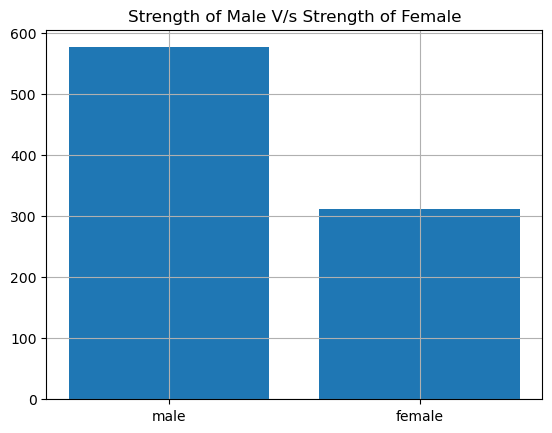

In [37]:
# Plot a graph : Strength of Male V/s Strength of Female

plt.bar(x=df.Sex.unique(),height = df.Sex.value_counts());
plt.grid()
plt.title('Strength of Male V/s Strength of Female');

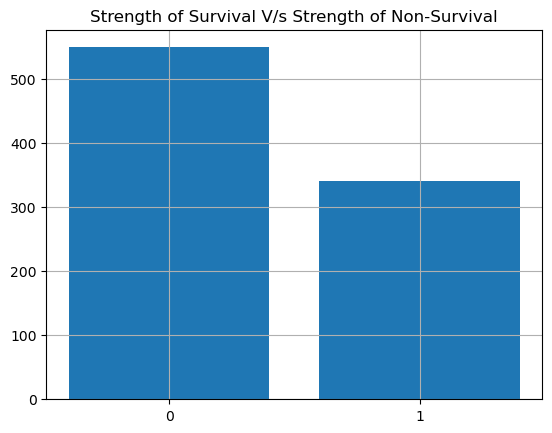

In [38]:
# Plot a graph : Strength of Survival V/s Strength of Non-Survival

plt.bar(x=df.Survived.unique(), height=df.Survived.value_counts());
plt.grid()
plt.title('Strength of Survival V/s Strength of Non-Survival');
plt.xticks([0,1]);

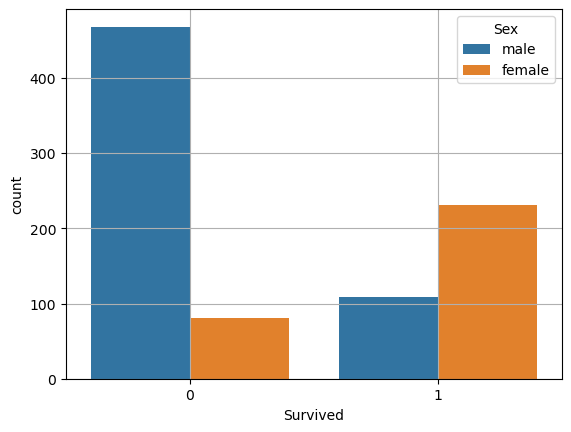

In [39]:
# Plot a Graph to find out the survival and non-survival rate w.r.t Sex
sns.countplot(x = 'Survived', data=df,hue="Sex");
plt.grid()

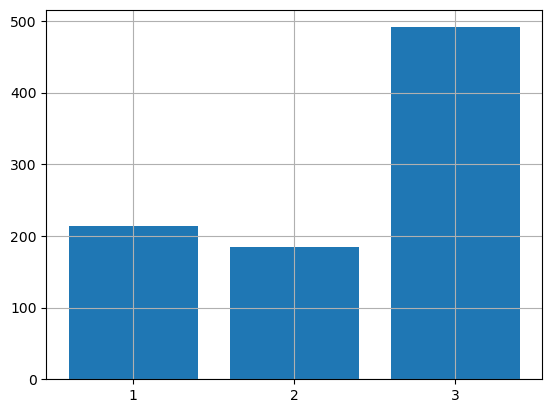

In [40]:
# Plot a graph to find out the strength of the Pclass
plt.bar(x = df.Pclass.unique(),height = df.Pclass.value_counts());
plt.xticks([1,2,3]);
plt.grid();

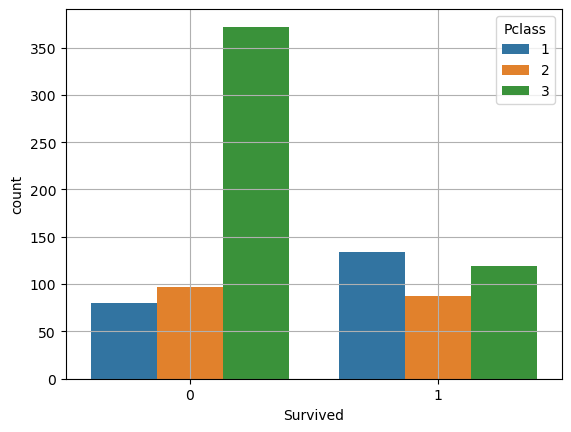

In [41]:
# Plot a Graph to find out the survival and non-survival rate w.r.t Pclass
sns.countplot(x = 'Survived', data=df,hue="Pclass");
plt.grid()

## More Eda can be done- More plots, more graphs, more chart, more rate, percentage, etc.

In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [43]:
# Changing the Age dtype from float to int
df.Age = df.Age.astype(int)

In [44]:
# Rounding off the Fare value to 2 decimal
df.Fare = round(df.Fare,2)

## Encoders to conver categorical columns to numerical columns without changing its meaning.

In [45]:
# LabelEncoder for the column Sex
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.Sex = enc.fit_transform(df.Sex)

In [46]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [47]:
# OneHotEncoding for the Column Embarked
df = pd.concat([df,pd.get_dummies(df['Embarked'])],axis =1)

In [48]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1


In [49]:
df.drop(['Embarked', 'C'],axis=1, inplace= True)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    int32  
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(1), int32(2), int64(4), uint8(2)
memory usage: 50.4 KB


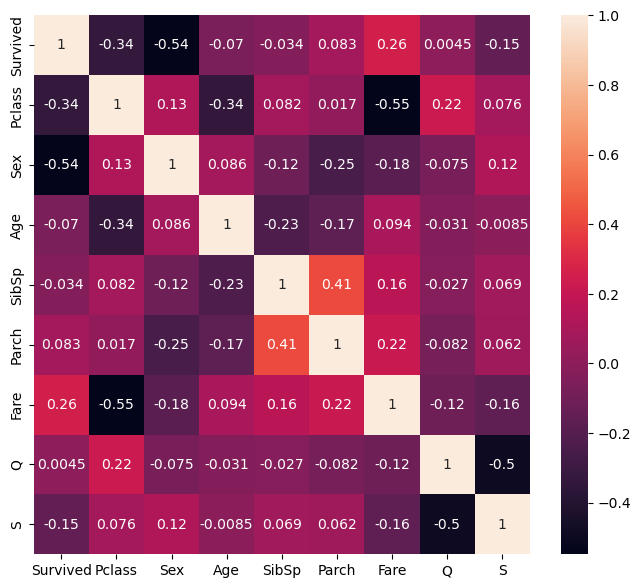

In [52]:
# Corelation
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), annot=True);

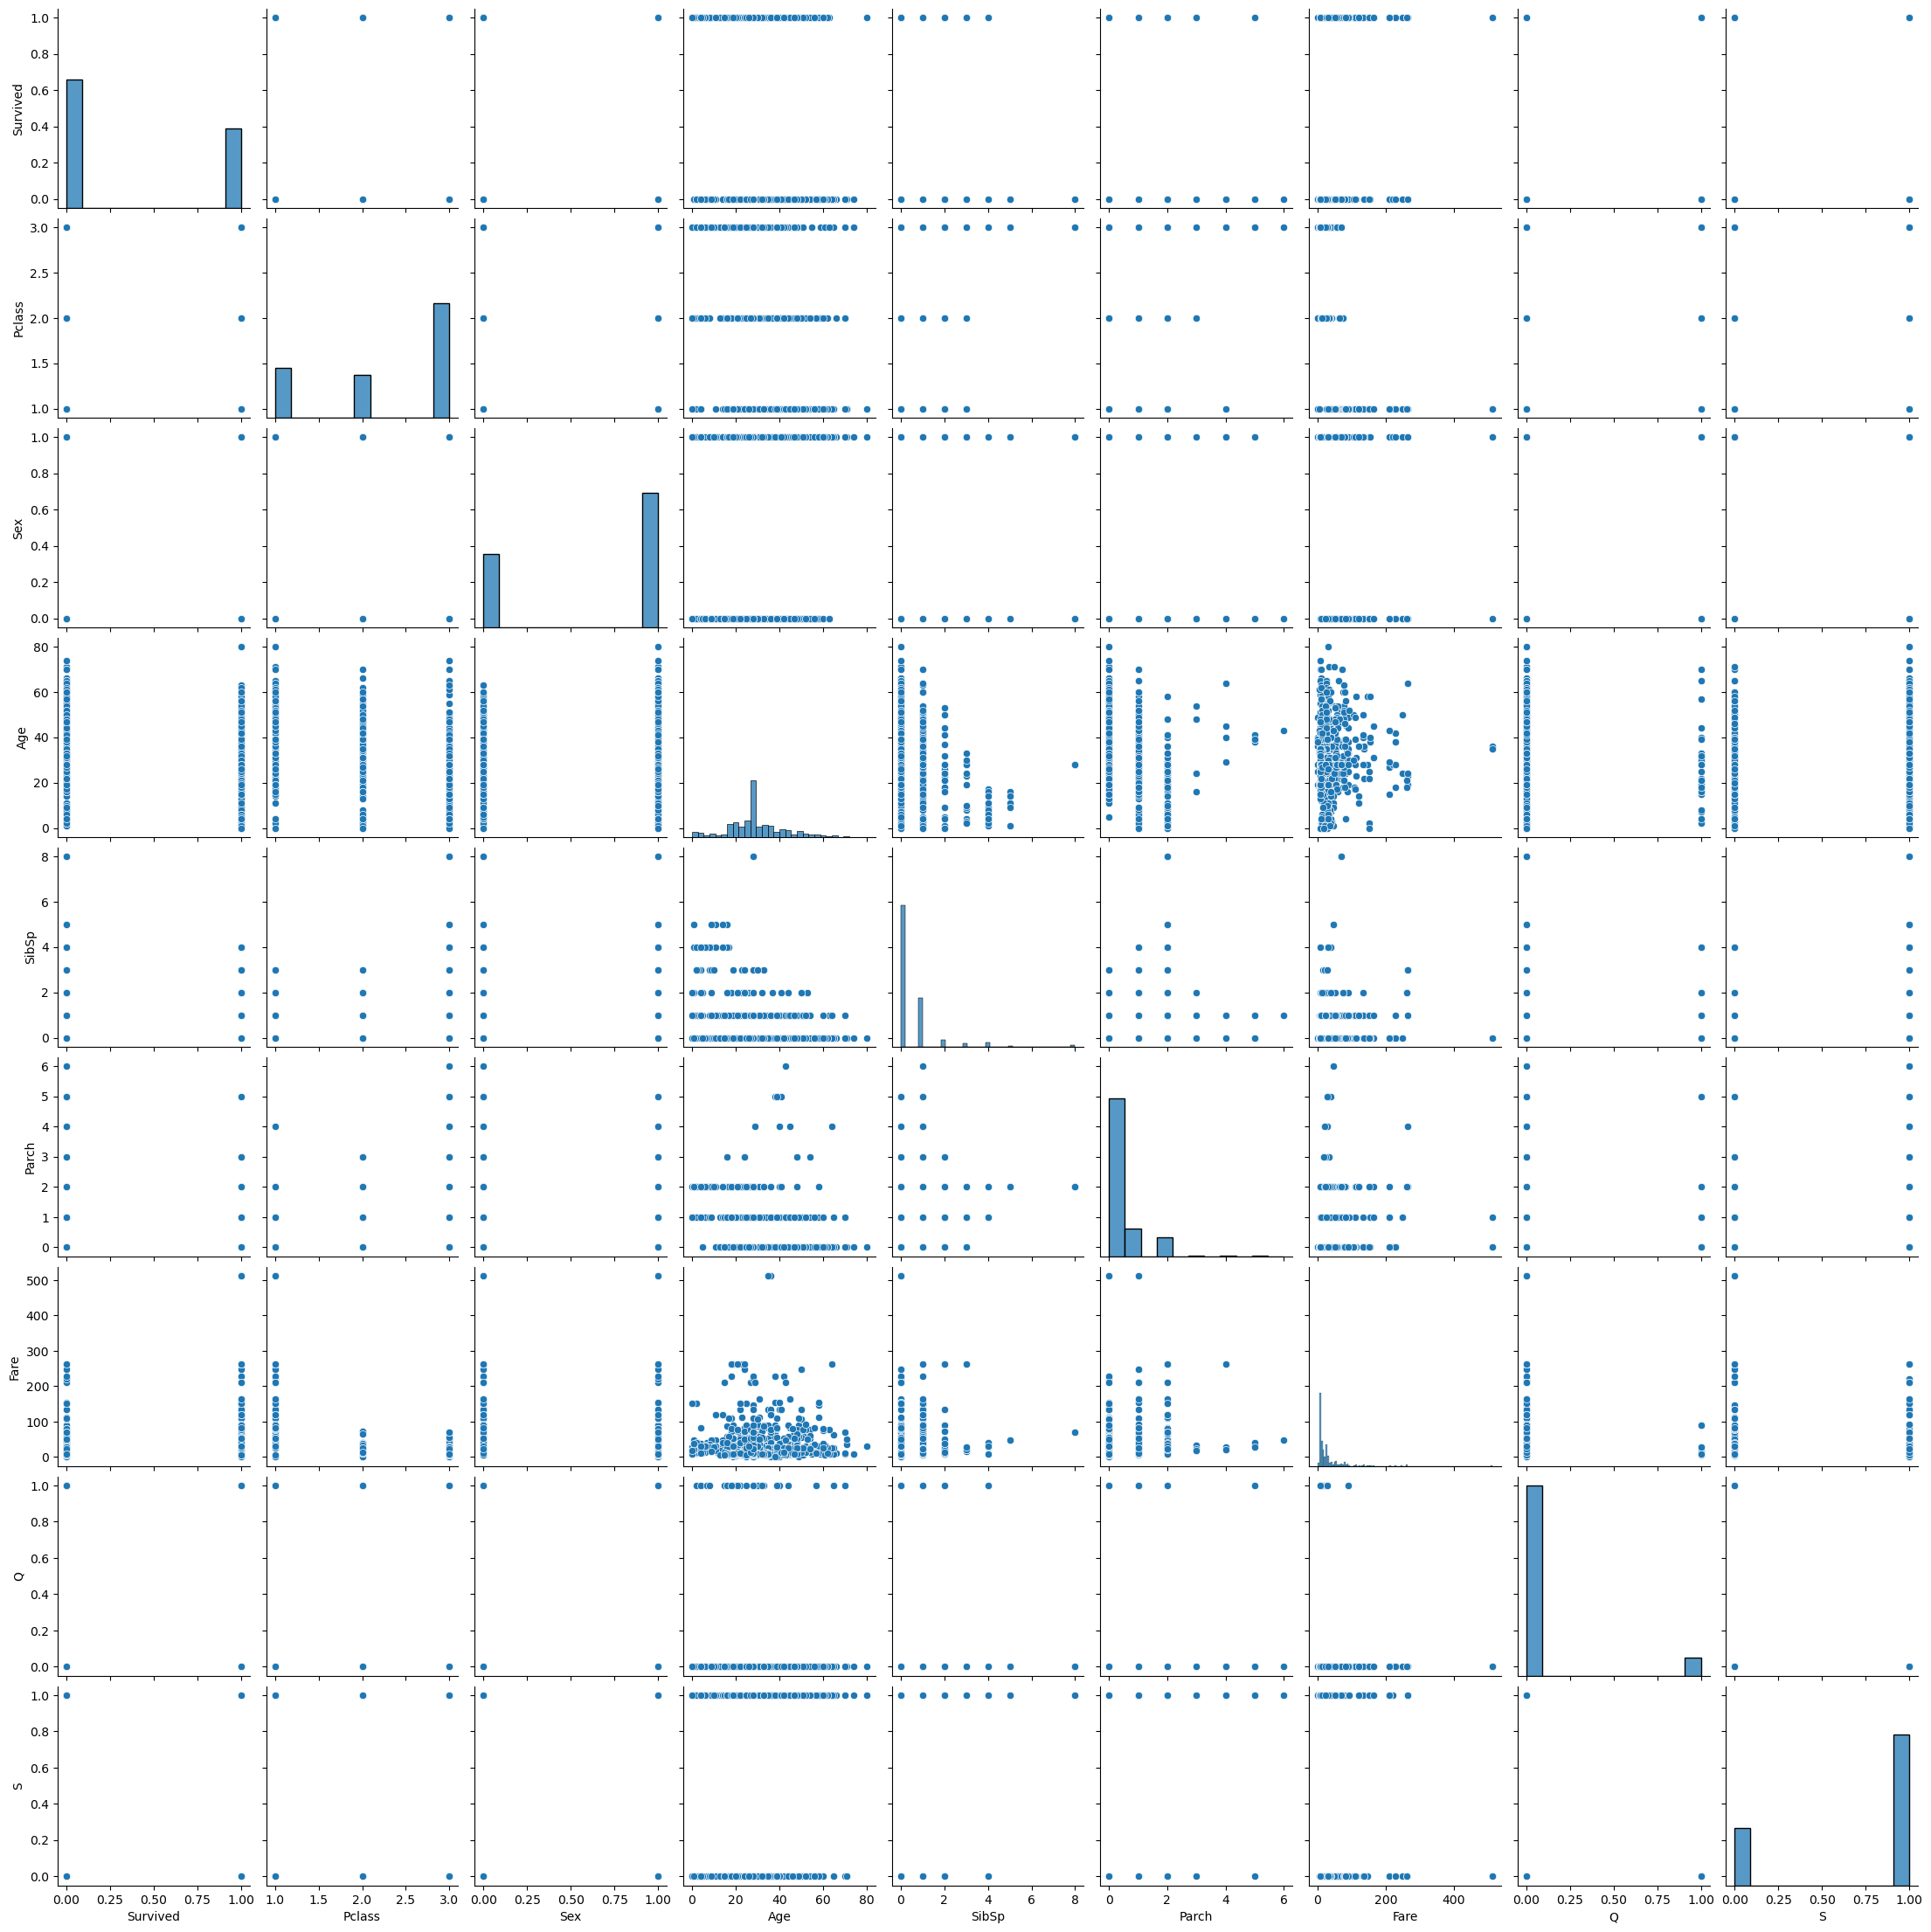

In [53]:
sns.pairplot(df);

### Feature Importance / Feature Selections

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [55]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [56]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [57]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [58]:
from sklearn.ensemble import ExtraTreesClassifier

In [59]:
feat = ExtraTreesClassifier()

In [60]:
feat.fit(X,y)

ExtraTreesClassifier()

In [61]:
feat.feature_importances_

array([0.10629196, 0.28915465, 0.24604192, 0.04782999, 0.04378056,
       0.23644581, 0.00989875, 0.02055638])

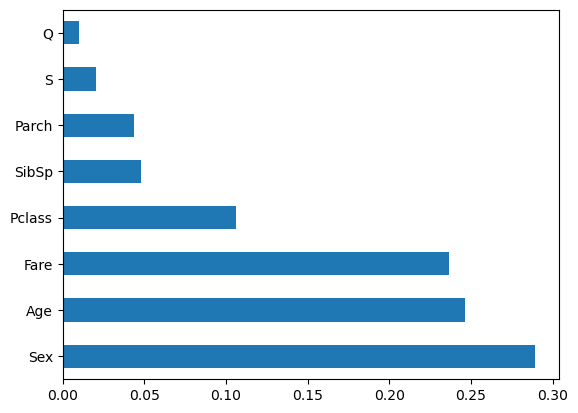

In [62]:
feat_imp = pd.Series(feat.feature_importances_,index=X.columns)
feat_imp.nlargest(8).plot(kind='barh');

### Splitting the Data

In [63]:
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

### Model Selection

In [64]:
classifier = LogisticRegression()

### Trainig the Model

In [65]:
classifier.fit(X_train,y_train)

LogisticRegression()

### Testing the Model

In [66]:
y_pred = classifier.predict(X_test)

### EDA

In [67]:
final = pd.DataFrame({"Actula":y_test, "Prediction":y_pred})

In [68]:
final.head()

,Actula,Prediction
706,1,1
707,1,0
708,1,1
709,1,0
710,1,1


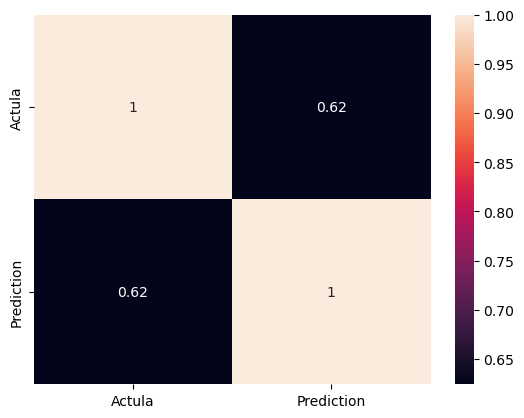

In [69]:
sns.heatmap(final.corr(),annot = True);

### Preformance Matrix - Confusion Matrix

In [70]:
confusion_matrix(y_test, y_pred)

array([[98, 11],
       [20, 48]], dtype=int64)

In [71]:
accuracy = 146/177
accuracy

0.8248587570621468

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
accuracy_score(y_test, y_pred)

0.8248587570621468

In [74]:
from sklearn.metrics import classification_report

In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       109
           1       0.81      0.71      0.76        68

    accuracy                           0.82       177
   macro avg       0.82      0.80      0.81       177
weighted avg       0.82      0.82      0.82       177



### Exportation of the Model & datasets

- Module --> Pickle
- Serialisation --> Deserialisation
- Dumping --> Undumping
- Pickling --> Unpickling

In [76]:
import pickle


In [77]:
pick = pickle.dumps(classifier)

In [78]:
unpickle = pickle.loads(pick)